In [3]:
import pandas as pd
df=pd.read_csv("GlobalCO2Emissions.csv")
df.head()

,Year,Emissions
0,1750,0.03
1,1760,0.03
2,1770,0.03
3,1780,0.03
4,1790,0.04


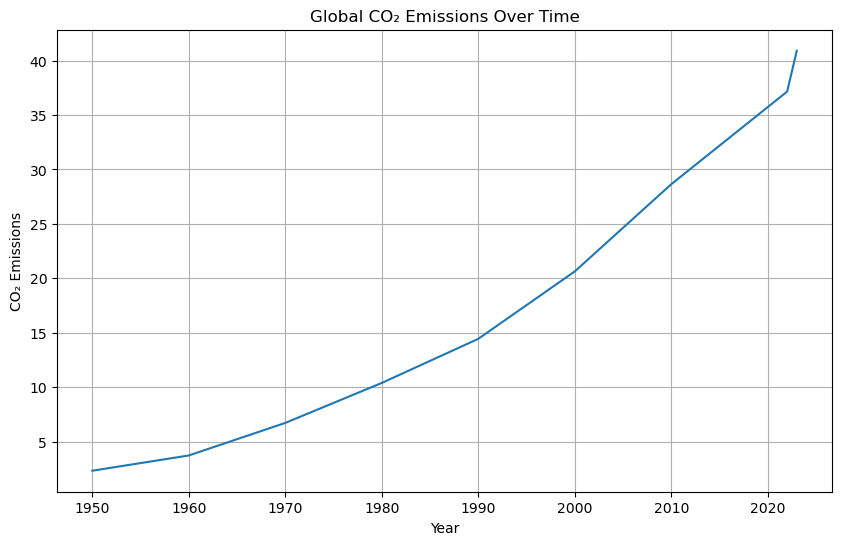

In [19]:
#Line Plot
df_close = df[df["Year"] >= 1950]

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.lineplot(data=df_close,x="Year",y="Emissions")
plt.title("Global CO₂ Emissions Over Time") 
plt.xlabel("Year")
plt.ylabel("CO₂ Emissions")
plt.grid(True)
plt.show()

In [27]:
print(df["Year"].unique())

[1750 1760 1770 1780 1790 1800 1810 1820 1830 1840 1850 1860 1870 1880
 1890 1900 1910 1920 1930 1940 1950 1960 1970 1980 1990 2000 2010 2022
 2023]


In [29]:
years = [2000,2010,2022,2023]
df_check=df[df["Year"].isin(years)]

print(df_check)

    Year  Emissions
25  2000      20.64
26  2010      28.65
27  2022      37.15
28  2023      40.90


In [31]:
import xgboost as xgb
x=df[["Year"]]
y=df["Emissions"]

In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [37]:
model=xgb.XGBRegressor()
model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [39]:
y_pred = model.predict(x_test)

In [43]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import numpy as np
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
r2=r2_score(y_test,y_pred)

print(f"MAE = {mae}")
print(f"RMSE = {rmse}")
print(f"R2 = {r2}")

MAE = 1.965225679328044
RMSE = 3.679769637463147
R2 = 0.9253283922922023


In [45]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    "learning_rate" : [0.01,0.1,0.3,0.5],
    "max_depth" : [3,5,7,9],
    "n_estimators":[50,100,200],
    "subsample" : [0.6,0.8,1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(x_train, y_train)

print(f"Best Parameter: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")


Best Parameter: {'colsample_bytree': 0.6, 'learning_rate': 0.3, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.6}
Best Score: -27.6494014697606


In [47]:
model = xgb.XGBRegressor(
    colsample_bytree=0.6,
    learning_rate=0.3,
    max_depth=3,
    n_estimators=50,
    subsample=0.6
)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE = {mae}")
print(f"RMSE = {rmse}")
print(f"R2 = {r2}")

MAE = 1.937186744213104
RMSE = 3.612900066386224
R2 = 0.9280176307935163


In [49]:
#Prediction
future_years = pd.DataFrame({"Year":[2025,2030,2040]})

future_preds = model.predict(future_years)

for year,pred in zip(future_years["Year"],future_preds):
    print(f"{year} CO2 Emission : {pred:.2f}")

2025 CO2 Emission : 40.54
2030 CO2 Emission : 40.54
2040 CO2 Emission : 40.54


In [65]:
#Quadratic Feature
df['Year_sq'] = df['Year'] ** 2
x = df[['Year', 'Year_sq']]
y = df['Emissions']

# Modeli yeniden eğitelim
model = XGBRegressor(n_estimators=200, max_depth=5, learning_rate=0.1, random_state=42)
model.fit(x, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [67]:
future_years['Year_sq'] = future_years['Year'] ** 2

# Tahmin yapalım
future_preds = model.predict(future_years)

# Sonuçları yazdıralım
for year, pred in zip(future_years["Year"], future_preds):
    print(f"{year} CO2 Emission : {pred:.2f}")

2025 CO2 Emission : 40.90
2030 CO2 Emission : 40.90
2040 CO2 Emission : 40.90


In [69]:
#Different Model for same output
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(x, y)

rf_future_preds = rf_model.predict(future_years)

for year, pred in zip(future_years["Year"], rf_future_preds):
    print(f"{year} CO2 Emission : {pred:.2f}")


2025 CO2 Emission : 37.56
2030 CO2 Emission : 37.56
2040 CO2 Emission : 37.56


In [51]:
x_all = pd.concat([x,future_years])
y_all = pd.concat([y,pd.Series(future_preds)])

df_all = pd.DataFrame({"Year" : x_all["Year"],"Emissions":y_all})
df_all["Type"] = ["Gerçek"] * len(y) + ["Tahmin"] * len(future_preds)


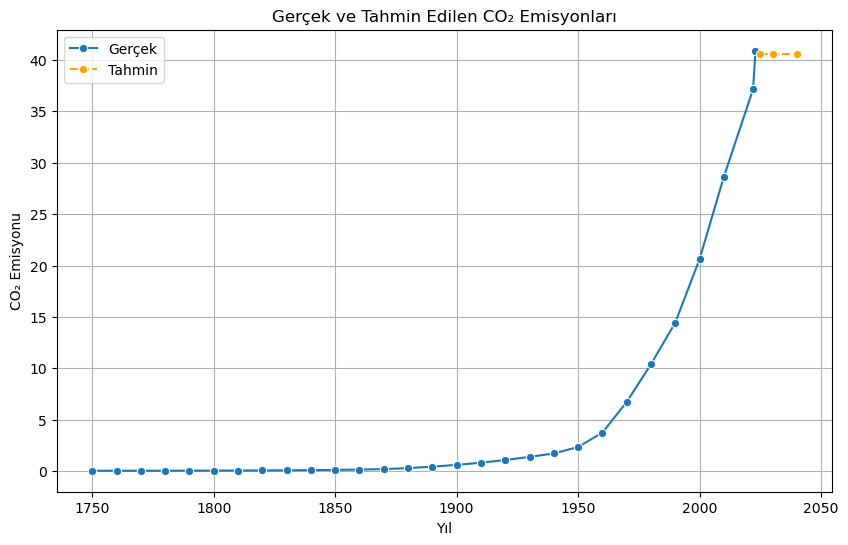

In [53]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df_all[df_all["Type"]=="Gerçek"], x="Year", y="Emissions", label="Gerçek", marker="o")
sns.lineplot(data=df_all[df_all["Type"]=="Tahmin"], x="Year", y="Emissions", label="Tahmin", marker="o", linestyle="--", color="orange")
plt.title("Gerçek ve Tahmin Edilen CO₂ Emisyonları")
plt.xlabel("Yıl")
plt.ylabel("CO₂ Emisyonu")
plt.grid(True)
plt.legend()
plt.show()


In [71]:
df = pd.read_csv("co2_emissions_kt_by_country.csv")

print(df.head())

print(df.columns)


  country_code country_name  year      value
0          ABW        Aruba  1960  11092.675
1          ABW        Aruba  1961  11576.719
2          ABW        Aruba  1962  12713.489
3          ABW        Aruba  1963  12178.107
4          ABW        Aruba  1964  11840.743
Index(['country_code', 'country_name', 'year', 'value'], dtype='object')


In [79]:
print(df.isnull().sum())

df_sorted = df.sort_values(by=["year"])

df_turkey_2019 = df_turkey[df_turkey['year'] <= 2019]

print(df_turkey.head())


country_code    0
country_name    0
year            0
value           0
dtype: int64
      country_code country_name  year      value
12849          TUR       Turkey  1960  16820.529
12850          TUR       Turkey  1961  17363.245
12851          TUR       Turkey  1962  21631.633
12852          TUR       Turkey  1963  22669.394
12853          TUR       Turkey  1964  26336.394


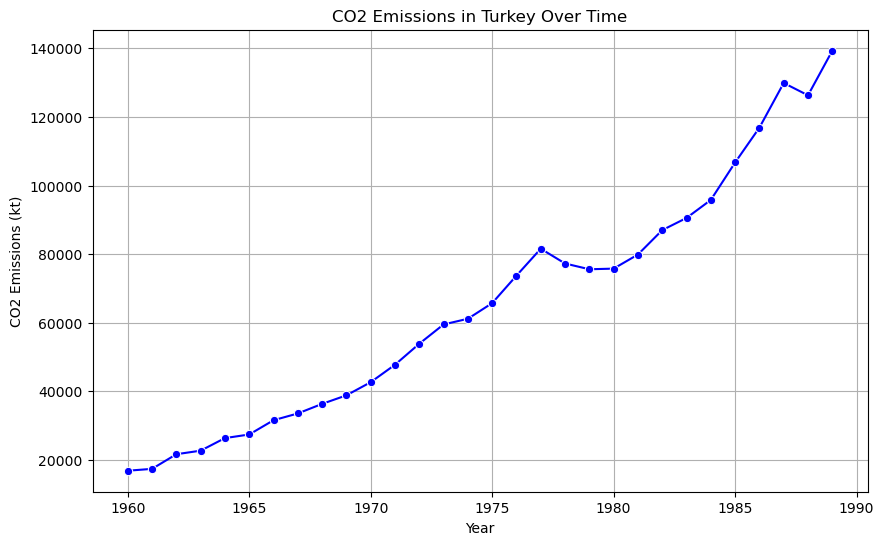

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

df_turkey_sorted = df_turkey[df_turkey['year'] <= 2019].sort_values(by="year")

plt.figure(figsize=(10,6))
sns.lineplot(data=df_turkey_sorted, x="year", y="value", marker="o", color="blue")
plt.title("CO2 Emissions in Turkey Over Time")
plt.xlabel("Year")
plt.ylabel("CO2 Emissions (kt)")
plt.grid(True)
plt.show()


In [87]:
df_turkey_sorted = df_turkey.sort_values(by=["year"])

print(df_turkey_sorted["year"].unique())


[1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973
 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987
 1988 1989]


In [77]:
min_year = df_turkey.loc[df_turkey['value'].idxmin()]
max_year = df_turkey.loc[df_turkey['value'].idxmax()]

print(f"lowest emission: {min_year['year']} - {min_year['value']} kt")
print(f"highest emission: {max_year['year']} - {max_year['value']} kt")

print(df_turkey['value'].describe())


lowest emission: 1960 - 16820.529 kt
highest emission: 1989 - 139316.664 kt
count        30.000000
mean      65305.969700
std       35582.735135
min       16820.529000
25%       34221.360750
50%       63417.098000
75%       85634.534250
max      139316.664000
Name: value, dtype: float64


1990 CO2 Emission: 126761.44 kt
1991 CO2 Emission: 130726.31 kt
1992 CO2 Emission: 134691.18 kt
1993 CO2 Emission: 138656.04 kt
1994 CO2 Emission: 142620.91 kt
1995 CO2 Emission: 146585.78 kt
1996 CO2 Emission: 150550.65 kt
1997 CO2 Emission: 154515.52 kt
1998 CO2 Emission: 158480.39 kt
1999 CO2 Emission: 162445.26 kt
2000 CO2 Emission: 166410.13 kt
2001 CO2 Emission: 170375.00 kt
2002 CO2 Emission: 174339.86 kt
2003 CO2 Emission: 178304.73 kt
2004 CO2 Emission: 182269.60 kt
2005 CO2 Emission: 186234.47 kt
2006 CO2 Emission: 190199.34 kt
2007 CO2 Emission: 194164.21 kt
2008 CO2 Emission: 198129.08 kt
2009 CO2 Emission: 202093.95 kt
2010 CO2 Emission: 206058.82 kt
2011 CO2 Emission: 210023.68 kt
2012 CO2 Emission: 213988.55 kt
2013 CO2 Emission: 217953.42 kt
2014 CO2 Emission: 221918.29 kt
2015 CO2 Emission: 225883.16 kt
2016 CO2 Emission: 229848.03 kt
2017 CO2 Emission: 233812.90 kt
2018 CO2 Emission: 237777.77 kt
2019 CO2 Emission: 241742.64 kt
2020 CO2 Emission: 245707.50 kt
2021 CO2

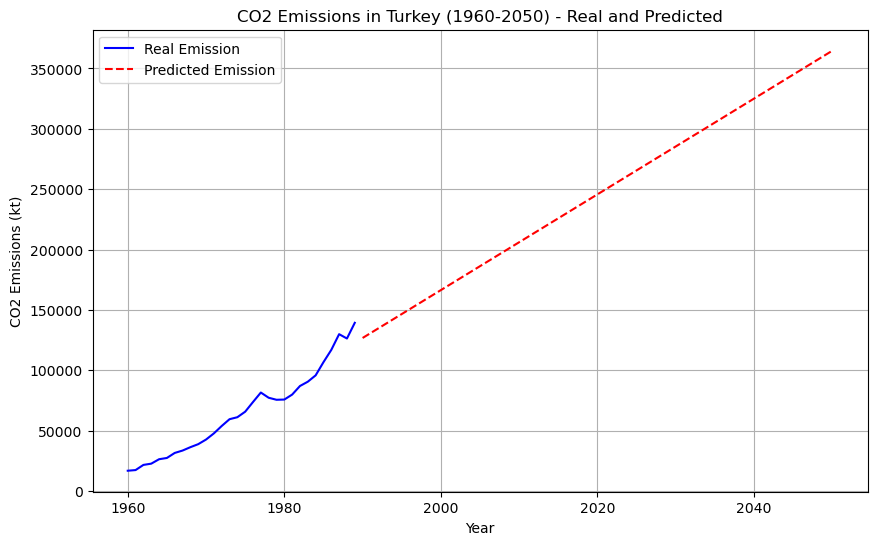

In [93]:
from sklearn.linear_model import LinearRegression
df_train = df_turkey[df_turkey['year'] <= 1989]

X = df_train[['year']]
y = df_train['value']

model = LinearRegression()
model.fit(X, y)

future_years = pd.DataFrame({'year': range(1990, 2051)})
future_preds = model.predict(future_years)

for year, pred in zip(future_years['year'], future_preds):
    print(f"{year} CO2 Emission: {pred:.2f} kt")

df_future = pd.DataFrame({
    'year': range(1990, 2051),
    'predicted_value': future_preds
})

df_combined = pd.concat([df_turkey[['year', 'value']], df_future], ignore_index=True)

df_combined = df_combined.sort_values(by="year")

plt.figure(figsize=(10,6))
sns.lineplot(data=df_combined, x='year', y='value', label='Real Emission', color='blue')
sns.lineplot(data=df_combined, x='year', y='predicted_value', label='Predicted Emission', color='red', linestyle='--')
plt.title("CO2 Emissions in Turkey (1960-2050) - Real and Predicted")
plt.xlabel("Year")
plt.ylabel("CO2 Emissions (kt)")
plt.legend()
plt.grid(True)
plt.show()